In [2]:
!pip install keras-preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 527.8 kB/s eta 0:00:00


In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!unzip -q "/content/drive/MyDrive/manual dataset.zip"

replace manual dataset - Copy/test/angry/im0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
TRAIN_DIR = '/content/manual dataset /train'
TEST_DIR = '/content/manual dataset /test'

In [14]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [15]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

sad completed
happy completed
angry completed


In [16]:
print(train)

                                                 image  label
0        /content/manual dataset /train/sad/im1834.png    sad
1         /content/manual dataset /train/sad/im665.png    sad
2        /content/manual dataset /train/sad/im4082.png    sad
3         /content/manual dataset /train/sad/im647.png    sad
4        /content/manual dataset /train/sad/im4117.png    sad
...                                                ...    ...
16035  /content/manual dataset /train/angry/im2306.png  angry
16036  /content/manual dataset /train/angry/im1279.png  angry
16037  /content/manual dataset /train/angry/im1354.png  angry
16038   /content/manual dataset /train/angry/im704.png  angry
16039   /content/manual dataset /train/angry/im160.png  angry

[16040 rows x 2 columns]


In [17]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

sad completed
happy completed
angry completed


In [18]:
print(test)
print(test['image'])

                                              image  label
0       /content/manual dataset /test/sad/im665.png    sad
1       /content/manual dataset /test/sad/im647.png    sad
2      /content/manual dataset /test/sad/im1122.png    sad
3        /content/manual dataset /test/sad/im67.png    sad
4       /content/manual dataset /test/sad/im255.png    sad
...                                             ...    ...
3974  /content/manual dataset /test/angry/im875.png  angry
3975  /content/manual dataset /test/angry/im663.png  angry
3976  /content/manual dataset /test/angry/im250.png  angry
3977  /content/manual dataset /test/angry/im704.png  angry
3978  /content/manual dataset /test/angry/im160.png  angry

[3979 rows x 2 columns]
0         /content/manual dataset /test/sad/im665.png
1         /content/manual dataset /test/sad/im647.png
2        /content/manual dataset /test/sad/im1122.png
3          /content/manual dataset /test/sad/im67.png
4         /content/manual dataset /test/sad/im255.p

In [19]:
from tqdm.notebook import tqdm

In [20]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [21]:
train_features = extract_features(train['image'])

  0%|          | 0/16040 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [22]:
test_features = extract_features(test['image'])

  0%|          | 0/3979 [00:00<?, ?it/s]

In [23]:
x_train = train_features/255.0
x_test = test_features/255.0

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 3)
y_test = to_categorical(y_test,num_classes = 3)

In [34]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(3, activation='softmax'))

In [35]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [36]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
126/126 [==============================] - 18s 72ms/step - loss: 1.0689 - accuracy: 0.4463 - val_loss: 1.0634 - val_accuracy: 0.4458
Epoch 2/100
126/126 [==============================] - 7s 53ms/step - loss: 1.0514 - accuracy: 0.4647 - val_loss: 1.0303 - val_accuracy: 0.4855
Epoch 3/100
126/126 [==============================] - 7s 52ms/step - loss: 1.0286 - accuracy: 0.4854 - val_loss: 0.9958 - val_accuracy: 0.5119
Epoch 4/100
126/126 [==============================] - 7s 52ms/step - loss: 0.9793 - accuracy: 0.5191 - val_loss: 0.9019 - val_accuracy: 0.5758
Epoch 5/100
126/126 [==============================] - 7s 53ms/step - loss: 0.8958 - accuracy: 0.5686 - val_loss: 0.7956 - val_accuracy: 0.6233
Epoch 6/100
126/126 [==============================] - 7s 52ms/step - loss: 0.8401 - accuracy: 0.5981 - val_loss: 0.7602 - val_accuracy: 0.6358
Epoch 7/100
126/126 [==============================] - 6s 51ms/step - loss: 0.7860 - accuracy: 0.6405 - val_loss: 0.7229 - val_accuracy

In [37]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from keras.models import model_from_json

In [39]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

FileNotFoundError: [Errno 2] No such file or directory: 'facialemotionmodel.json'

In [40]:
label = ['angry','happy','sad']

In [41]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [43]:
image = '/content/manual dataset /test/angry/im100.png'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 [==============================] - 1s 658ms/step
model prediction is  angry


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 18ms/step
model prediction is  happy


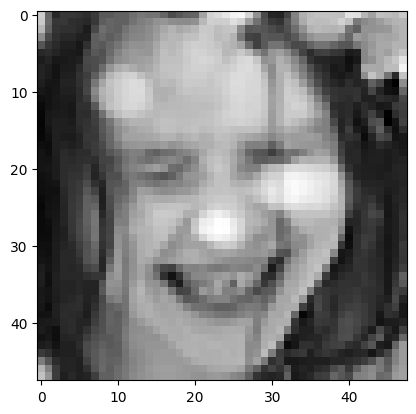

In [45]:
image = '/content/manual dataset /test/happy/im10.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 31ms/step
model prediction is  sad


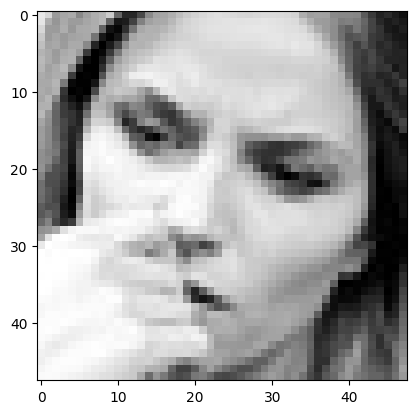

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 57ms/step
model prediction is  disgust


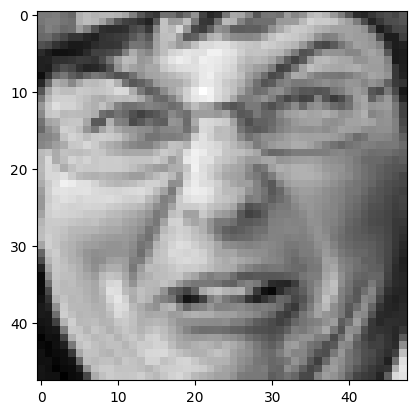

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


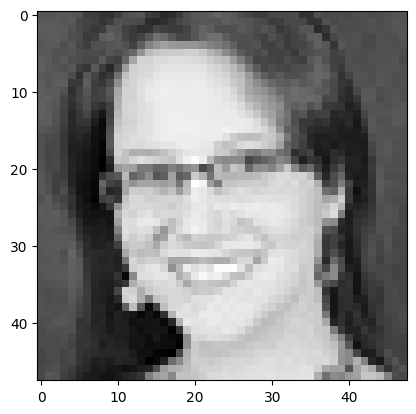

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 40ms/step
model prediction is  surprise


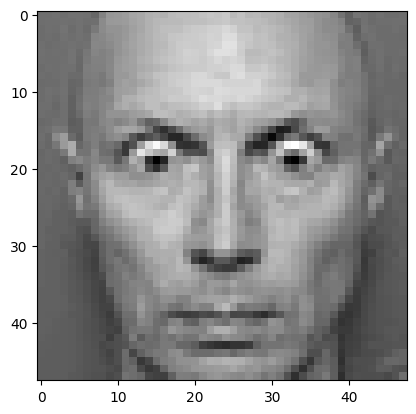

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [49]:
# prompt: i want to increase the test accurcy

# Increase the number of epochs
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 200, validation_data = (x_test,y_test))

# Use data augmentation techniques to increase the size of the training dataset
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=100, validation_data=(x_test, y_test))

# Use a different optimizer or learning rate
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

# Use a different model architecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/200
126/126 [==============================] - 7s 56ms/step - loss: 0.2421 - accuracy: 0.9038 - val_loss: 0.5655 - val_accuracy: 0.7884
Epoch 2/200
126/126 [==============================] - 7s 52ms/step - loss: 0.2439 - accuracy: 0.9056 - val_loss: 0.5801 - val_accuracy: 0.7851
Epoch 3/200
126/126 [==============================] - 7s 55ms/step - loss: 0.2459 - accuracy: 0.9063 - val_loss: 0.5726 - val_accuracy: 0.7803
Epoch 4/200
126/126 [==============================] - 6s 51ms/step - loss: 0.2451 - accuracy: 0.9065 - val_loss: 0.5525 - val_accuracy: 0.7839
Epoch 5/200
126/126 [==============================] - 7s 54ms/step - loss: 0.2419 - accuracy: 0.9094 - val_loss: 0.5703 - val_accuracy: 0.7836
Epoch 6/200
126/126 [==============================] - 7s 53ms/step - loss: 0.2438 - accuracy: 0.9064 - val_loss: 0.5666 - val_accuracy: 0.7896
Epoch 7/200
126/126 [==============================] - 7s 54ms/step - loss: 0.2379 - accuracy: 0.9092 - val_loss: 0.5643 - val_accuracy:

NameError: name 'ImageDataGenerator' is not defined

In [50]:
# prompt: give me code for to print Confusion matrix, precision, recall f1score accuracy and kappa score

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,cohen_kappa_score
def print_evaluation(test_labels,predicted_labels):
    cm = confusion_matrix(test_labels,predicted_labels)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(test_labels,predicted_labels))
    print("Accuracy Score:",accuracy_score(test_labels,predicted_labels))
    print("F1 Score:",f1_score(test_labels,predicted_labels,average='macro'))
    print("Kappa Score:",cohen_kappa_score(test_labels,predicted_labels))

# Predict on the test data
predictions = model.predict(x_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
test_labels = np.argmax(y_test, axis=1)

# Print the evaluation metrics
print_evaluation(test_labels, predicted_labels)


125/125 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 628  101  229]
 [  62 1601  111]
 [ 218  160  869]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       958
           1       0.86      0.90      0.88      1774
           2       0.72      0.70      0.71      1247

    accuracy                           0.78      3979
   macro avg       0.76      0.75      0.75      3979
weighted avg       0.78      0.78      0.78      3979

Accuracy Score: 0.7785875848203067
F1 Score: 0.7537967739224286
Kappa Score: 0.6546907208066064
